In [110]:
import pandas as pd
import numpy as np
import re 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib.collections import LineCollection

from sklearn import decomposition
from sklearn import preprocessing
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram

In [111]:

'''

Analyses descriptives :

- univariée, 
- bivariée,
- multivariée - ACP,
- visualisations, 


'''

'\n\nAnalyses descriptives :\n\n- univariée, \n- bivariée,\n- multivariée - ACP,\n- visualisations, \n\n\n'

In [112]:
data_first = pd.read_csv("data_nettoye.csv", sep=",")

In [113]:
data_desc = data_first.copy(deep=True)

In [114]:
data_desc

,Unnamed: 0,product_name,code,url,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,carbohydrates_100g,sugars_100g,carbohydrates_complexes_100g
0,1,banana chips sweetened (whole),4530,http://world-fr.openfoodfacts.org/produit/0000...,d,12.000000,2540.0,17.860000,3.57,14.290000
1,3,organic salted nut mix,16087,http://world-fr.openfoodfacts.org/produit/0000...,d,21.000000,2406.0,55.000000,42.50,12.500000
2,5,breadshop honey gone nuts granola,16100,http://world-fr.openfoodfacts.org/produit/0000...,d,18.666667,1540.0,73.680000,36.15,56.723333
3,8,organic dark chocolate minis,16193,http://world-fr.openfoodfacts.org/produit/0000...,d,0.000000,1824.0,60.000000,21.82,38.180000
4,10,organic adzuki beans,16612,http://world-fr.openfoodfacts.org/produit/0000...,d,-5.333333,1582.0,77.780000,2.22,75.560000
...,...,...,...,...,...,...,...,...,...,...
112566,179517,pains au lait (x 10) aux pépites de chocolat a...,20376390,http://world-fr.openfoodfacts.org/produit/2037...,d,15.333333,1393.0,66.670000,16.67,50.000000
112567,179518,pur jus de pomme 100%,20376451,http://world-fr.openfoodfacts.org/produit/2037...,c,9.000000,2155.0,49.493333,1.80,5.466667
112568,179521,puten-minifilet,20376833,http://world-fr.openfoodfacts.org/produit/2037...,a,0.000000,4.0,9.333333,1.00,10.000000
112569,179524,nectar multivitaminé linessa light,20377120,http://world-fr.openfoodfacts.org/produit/2037...,d,-4.000000,1643.0,74.800000,2.60,72.200000


In [115]:
del data_desc["Unnamed: 0"]

In [116]:
data_desc.describe()

,code,nutrition-score-fr_100g,energy_100g,carbohydrates_100g,sugars_100g,carbohydrates_complexes_100g
count,1.125710e+05,112571.000000,112571.000000,112571.000000,112571.000000,112571.000000
mean,1.290409e+13,8.978612,1133.678942,32.446830,15.664306,17.055042
std,1.270211e+15,8.828494,771.314247,28.606616,20.695099,20.900722
min,1.000000e+00,-14.000000,0.000000,0.000000,0.000000,0.000000
25%,4.138050e+10,1.000000,418.000000,6.670000,1.180000,1.000000
50%,7.707901e+10,9.000000,1117.000000,22.780000,5.560000,7.150000
75%,7.416430e+11,16.000000,1674.000000,57.900000,24.000000,25.880000
max,1.285057e+17,37.000000,3776.000000,100.000000,100.000000,100.000000


## Analyses univariées

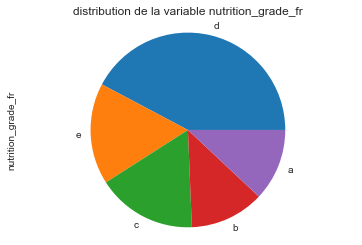

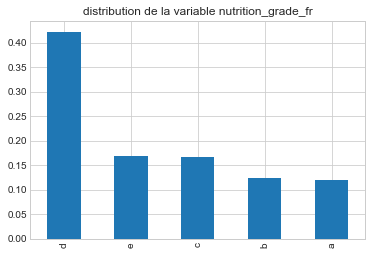

/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


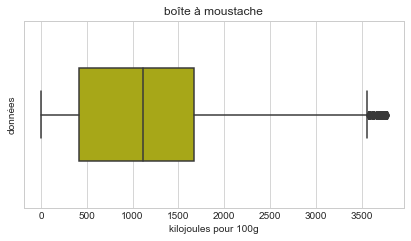

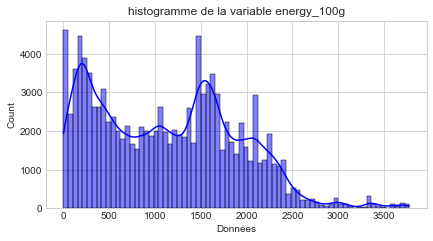

/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


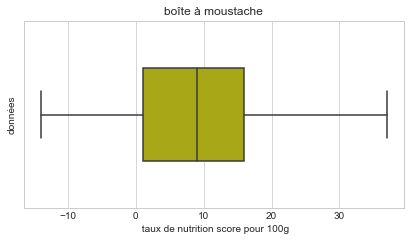

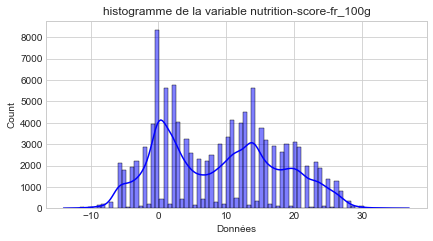

/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


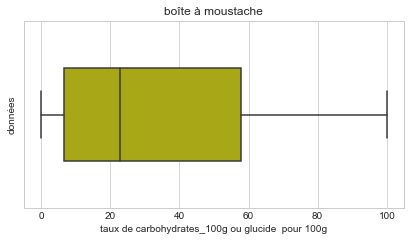

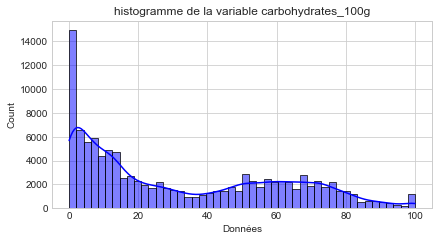

/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


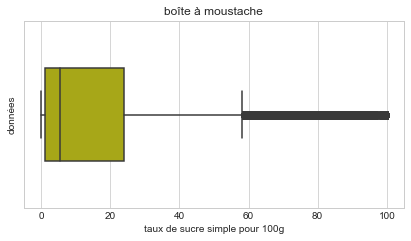

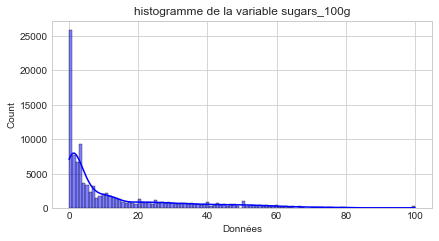

/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


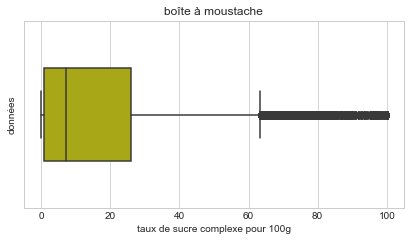

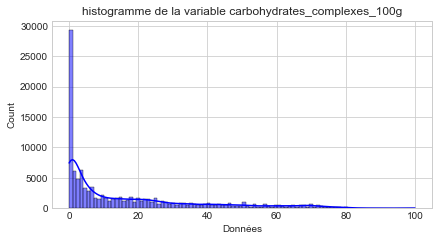

In [117]:
########################### VARIABLE QUALITATIVE #######################################

# Diagramme en secteurs
plt.title("distribution de la variable nutrition_grade_fr")
data_desc["nutrition_grade_fr"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
plt.title("distribution de la variable nutrition_grade_fr")
data_desc["nutrition_grade_fr"].value_counts(normalize=True).plot(kind='bar')
plt.show()

############################ VARIABLE QUANTITATIVE #####################################

# Boxplot ou boite à Moustache

plt.figure(figsize = (15, 20))
plt.subplot(5,2,1)
sns.boxplot(data_desc["energy_100g"], width=0.5, color="y")
plt.title("boîte à moustache")
plt.xlabel("kilojoules pour 100g")
plt.ylabel("données")
plt.show()

# Histogramme
plt.figure(figsize = (15, 20))
plt.subplot(5,2,2)
plt.title("histogramme de la variable energy_100g")
sns.histplot(data_desc["energy_100g"], kde = True, color= "b")
plt.xlabel("Données")
plt.show()

#-------------------------------------------------------------------------------------------------
# Boxplot ou boite à Moustache

plt.figure(figsize = (15, 20))
plt.subplot(5,2,3)
sns.boxplot(data_desc["nutrition-score-fr_100g"], width=0.5, color="y")
plt.title("boîte à moustache")
plt.xlabel(" taux de nutrition score pour 100g")
plt.ylabel("données")
plt.show()

# Histogramme
plt.figure(figsize = (15, 20))
plt.subplot(5,2,4)
plt.title("histogramme de la variable nutrition-score-fr_100g")
sns.histplot(data_desc["nutrition-score-fr_100g"], kde = True, color= "b")
plt.xlabel("Données")
plt.show()
#-------------------------------------------------------------------------------------------------

# Boxplot ou boite à Moustache

plt.figure(figsize = (15, 20))
plt.subplot(5,2,5)
sns.boxplot(data_desc["carbohydrates_100g"], width=0.5, color="y")
plt.title("boîte à moustache")
plt.xlabel("taux de carbohydrates_100g ou glucide  pour 100g")
plt.ylabel("données")
plt.show()

# Histogramme
plt.figure(figsize = (15, 20))
plt.subplot(5,2,6)
plt.title("histogramme de la variable carbohydrates_100g")
sns.histplot(data_desc["carbohydrates_100g"], kde = True, color= "b")
plt.xlabel("Données")
plt.show()

#-------------------------------------------------------------------------------------------------

# Boxplot ou boite à Moustache

plt.figure(figsize = (15, 20))
plt.subplot(5,2,7)
sns.boxplot(data_desc["sugars_100g"], width=0.5, color="y")
plt.title("boîte à moustache")
plt.xlabel("taux de sucre simple pour 100g")
plt.ylabel("données")
plt.show()

# Histogramme
plt.figure(figsize = (15, 20))
plt.subplot(5,2,8)
plt.title("histogramme de la variable sugars_100g")
sns.histplot(data_desc["sugars_100g"], kde = True, color= "b")
plt.xlabel("Données")
plt.show()

#-------------------------------------------------------------------------------------------------

# Boxplot ou boite à Moustache

plt.figure(figsize = (15, 20))
plt.subplot(5,2,9)
sns.boxplot(data_desc["carbohydrates_complexes_100g"], width=0.5, color="y")
plt.title("boîte à moustache")
plt.xlabel("taux de sucre complexe pour 100g")
plt.ylabel("données")
plt.show()

# Histogramme
plt.figure(figsize = (15, 20))
plt.subplot(5,2,10)
sns.histplot(data_desc["carbohydrates_complexes_100g"], kde = True, color= "b")
plt.title("histogramme de la variable carbohydrates_complexes_100g")
plt.xlabel("Données")
plt.show()


- On constate que la catégorie « a » n’est pas affiché sur les deux graphiques, au vu du peu de données que la catégorie a (42). On observe également que dans le jeu de données, il y a beaucoup plus de produits avec un nutriscore « mauvais » avec pratiquement 80% (à partir de « c », les produits ont un mauvais nutriscore).
- Pour la variable "energy_100g", forme bimodale, on distingue 2 groupes de produits autour de 0 kj et 1650 kj.
- Pour la variable "nutrition-score-fr_100g", forme bimodale, on distingue 2 groupes de produits autour de 0g et 14g.
- Pour la variable "carbohydrates_100g", forme bimodale, on distingue 2 groupes de produits autour de Og et 60g.
- Présence d'outliers pour les variables "energy_100g", "sugars_100g" et "carbohydrates_complexes_100g". 

In [118]:
# Statistiques descriptives
# "nutrition-score-fr_100g" "energy_100g"  "carbohydrates_100g" "sugars_100g" "carbohydrates_complexes_100g"
mean_nrj=data_desc["energy_100g"].mean()
mean_nutri=data_desc["nutrition-score-fr_100g"].mean()
mean_carb=data_desc["carbohydrates_100g"].mean()
mean_carb_c=data_desc["carbohydrates_complexes_100g"].mean()
mean_suc=data_desc["sugars_100g"].mean()

median_nrj=data_desc["energy_100g"].median()
median_nutri=data_desc["nutrition-score-fr_100g"].median()
median_carb=data_desc["carbohydrates_100g"].median()
median_carb_c=data_desc["carbohydrates_complexes_100g"].median()
median_suc=data_desc["sugars_100g"].median()

var_nrj=data_desc["energy_100g"].var(ddof=0)
var_nutri=data_desc["nutrition-score-fr_100g"].var(ddof=0)
var_carb=data_desc["carbohydrates_100g"].var(ddof=0)
var_carb_c=data_desc["carbohydrates_complexes_100g"].var(ddof=0)
var_suc=data_desc["sugars_100g"].var(ddof=0)

std_nrj=data_desc["energy_100g"].std(ddof=0)
std_nutri=data_desc["nutrition-score-fr_100g"].std(ddof=0)
std_carb=data_desc["carbohydrates_100g"].std(ddof=0)
std_carb_c=data_desc["carbohydrates_complexes_100g"].std(ddof=0)
std_suc=data_desc["sugars_100g"].std(ddof=0)

skew_nrj=data_desc["energy_100g"].skew()
skew_nutri=data_desc["nutrition-score-fr_100g"].skew()
skew_carb=data_desc["carbohydrates_100g"].skew()
skew_carb_c=data_desc["carbohydrates_complexes_100g"].skew()
skew_suc=data_desc["sugars_100g"].skew()

kurtosis_nrj=data_desc["energy_100g"].kurtosis()
kurtosis_nutri=data_desc["nutrition-score-fr_100g"].kurtosis()
kurtosis_carb=data_desc["carbohydrates_100g"].kurtosis()
kurtosis_carb_c=data_desc["carbohydrates_complexes_100g"].kurtosis()
kurtosis_suc=data_desc["sugars_100g"].kurtosis()

data_stats = [["mean",mean_nrj,mean_nutri,mean_carb,mean_carb_c,mean_suc],
        ["median",median_nrj,median_nutri,median_carb,median_carb_c,median_suc],
        ["var",var_nrj,var_nutri,var_carb,var_carb_c,var_suc], 
        ["std",std_nrj,std_nutri,std_carb,std_carb_c,std_suc], 
        ["skew",skew_nrj,skew_nutri,skew_carb,kurtosis_carb_c,kurtosis_suc], 
        ["kurtosis",kurtosis_nrj,kurtosis_nutri,kurtosis_carb,kurtosis_carb_c, kurtosis_suc]]
df_stat = pd.DataFrame(data_stats,columns=["Description","Stat_energy","Stat_nutriscore","Stat_glucide","Stat_sucre_complexe","Stat_sucre_simple"])
df_stat

,Description,Stat_energy,Stat_nutriscore,Stat_glucide,Stat_sucre_complexe,Stat_sucre_simple
0,mean,1133.678942,8.978612,32.446830,17.055042,15.664306
1,median,1117.000000,9.000000,22.780000,7.150000,5.560000
2,var,594920.382635,77.941615,818.331217,436.836282,428.283338
3,std,771.310821,8.828455,28.606489,20.900629,20.695008
4,skew,0.366439,0.183210,0.525608,1.079109,2.253676
5,kurtosis,-0.532892,-0.983032,-1.072852,1.079109,2.253676


- Les courbes des variables "carbohydrates_complexes_100g" et "sugars_100g" sont légérement étalées à droite (skewness positif), moins aplaties que la distribution normale (kurtosis empirique positif, observations plus concentrée, leur variance est élevée.
- La courbe de la variable "energy_100g" est bimodale, étalée à droite (skewness positif), plus aplatie que la distribution normale (kurtosis empirique négatif).
- La courbe de la variable "nutrition-score-fr_100g" est bimodale, étalée à droite (skewness positif), plus aplatie que la distribution normale (kurtosis empirique négatif).  
- La courbe de la variable "carbohydrates_100g" est bimodale, étalée à droite (skewness positif) et plus aplatie que la distribution normale (kurtosis empirique négatif).

## Analyses bivariées, variables quantitatives

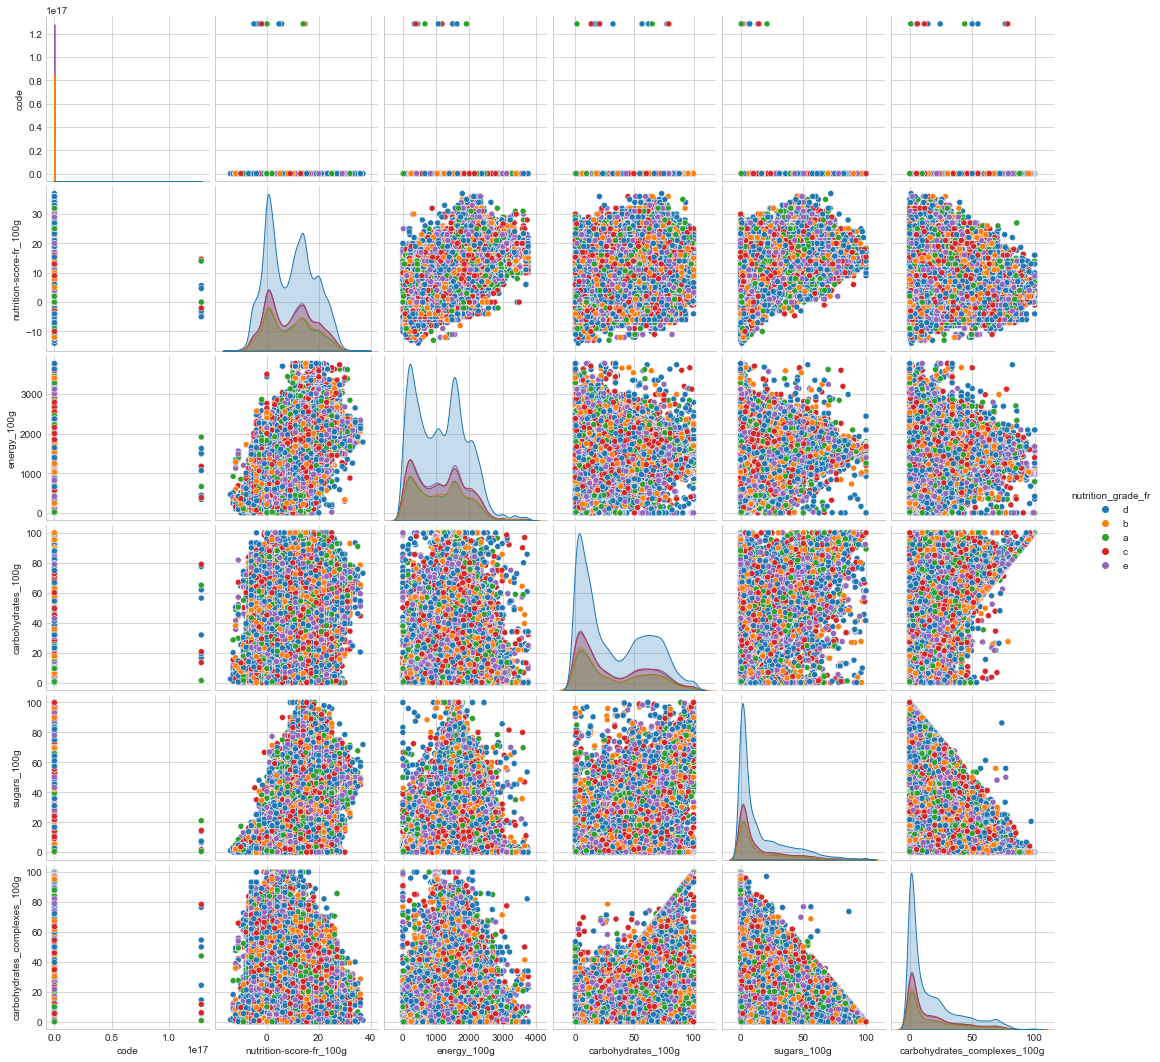

In [119]:
sns.pairplot(data_desc,hue="nutrition_grade_fr")
plt.show()

## Analyse bivariée, l'une qualitative et l'autre quantitative avec l'ANOVA

### matrice de corrélation

In [120]:
corr = data_desc.corr()
corr.style.background_gradient(cmap='coolwarm')

,code,nutrition-score-fr_100g,energy_100g,carbohydrates_100g,sugars_100g,carbohydrates_complexes_100g
code,1.000000,-0.007519,-0.000452,0.002659,-0.004209,0.007681
nutrition-score-fr_100g,-0.007519,1.000000,0.654168,0.295122,0.474081,-0.056448
energy_100g,-0.000452,0.654168,1.000000,0.534128,0.343346,0.384089
carbohydrates_100g,0.002659,0.295122,0.534128,1.000000,0.649710,0.684881
sugars_100g,-0.004209,0.474081,0.343346,0.649710,1.000000,-0.057726
carbohydrates_complexes_100g,0.007681,-0.056448,0.384089,0.684881,-0.057726,1.000000


In [121]:
X = "nutrition_grade_fr" # qualitative
Y = "sugars_100g" # quantitative

# On garde le taux de sugars_100g
sous_echantillon = data_desc.copy()


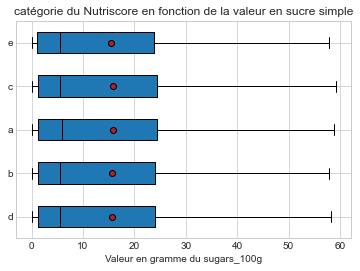

In [122]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.title("catégorie du Nutriscore en fonction de la valeur en sucre simple")
plt.xlabel("Valeur en gramme du sugars_100g")    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

- Les points rouges au milieu de chaque boîte à moustache représentent la moyenne des valeurs.
- On voit ici que la moyenne des valeurs est assez proche d'une catégorie à l'autre.
- On voit également que les valeurs sont très similaire d'une catégorie à l'autre. Les valeurs ("b", "c", "d" et "e") de la variable "nutrition_grade_fr" sont toutes rapprochées.
Remarque: on constate que le mode "a" n'est pas représenté sur le graphique ci dessus (boite à moustache), il y a très peu de données (42 lignes). cette catégorie a "disparu" après imputation.

--> Vérifions cette affirmation par les chiffres, grâce à la modélisation (Ce modèle est très utilisé en statistiques inférentielles et est appelé analyse de la variance, en anglais ANalysis Of VAriance (ANOVA)).
On calculer ici le rapport de corrélation, compris entre 0 et 1, donné par : η2Y/X = Vinterclasses/Vtotale
Vinterclasses :Variation interclasse et Vtotale :Variation totale (les classes sont les modalités de X).


In [123]:
X = "nutrition_grade_fr" # qualitative
Y = "sugars_100g" # quantitative

sous_echantillon = data_desc # On crée un sous dataframe

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

1.6953299783196444e-05

On a η2Y/X =1.6953299783196444e-05 (proche de 0), cela signifie que les moyennes par variable sont toutes proches. Il n’y a donc pas a priori de relation entre les variables Y et X, c'est à dire entre "nutrition_grade_fr" et "sugars_100g".


-----------------------------------------------------------------------------------------------------------------
remarque: si proche de 1, cela signifie que les moyennes des variables sont toutes différentes les unes des autres autres mais au sein d'une variable les valeurs sont très peu dispersées et sont autour de la moyenne de la variable. A priori une très forte relation entre X et Y.

## Analyse multivariée par une ACP sur les variables quantitatives

Je crée un dataframe en conservant uniquement les variables quantitatives pour effectuer l'ACP

In [124]:
data_acp=pd.DataFrame(data_desc, columns = ["nutrition-score-fr_100g","energy_100g", "sugars_100g","carbohydrates_100g","carbohydrates_complexes_100g"])

Voici les fonctions qu'on va utiliser pour notre ACP.
Source : cours https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp

In [125]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [126]:
# choix du nombre de composantes à calculer
n_comp = 5

In [127]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = data_acp[["nutrition-score-fr_100g","energy_100g", "sugars_100g","carbohydrates_100g","carbohydrates_complexes_100g"]]

In [128]:
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data_desc.index # ou data_desc["product_name"] pour avoir les intitulés

features = data_acp.columns # ou data_desc à voir!

In [129]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [130]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=5)

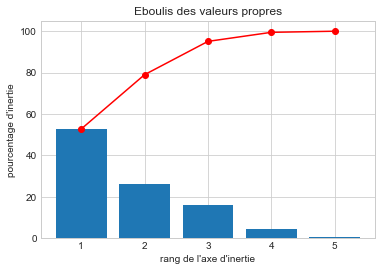

In [131]:
# Eboulis des valeurs propres
display_scree_plot(pca)

On constate que le pourcentage d’inertie totale associé à chaque axe. On a plus de 50% de l'inertie sur le premier axe, puis environ  25% sur le second axe. Le premier plan factoriel représente plus de 75% de l'inertie totale.le deuxième plan factoriel représente environ 22% de l'inertie totale.

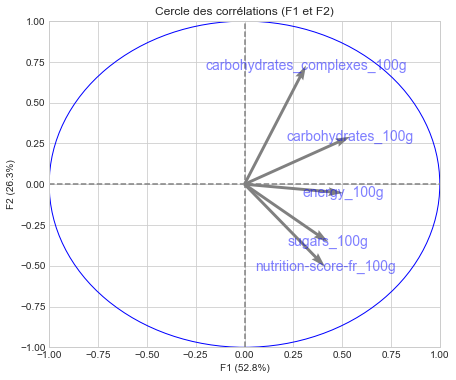

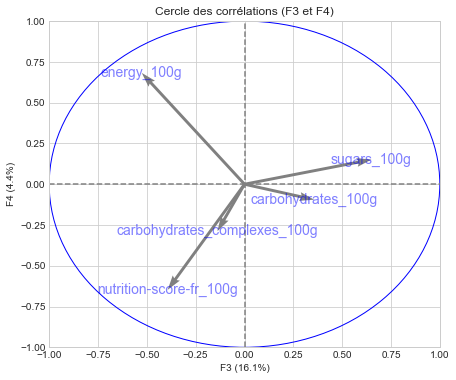

In [132]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

Les variables les plus corrélées à F1 sont :
"carbohydrates_100g" ;
"sugars_100g" ;
"energy_100g";
Elles sont corrélées positivement à F1.
Intuitivement, on comprend que, plus un produit est composé de glucide, plus le produit a des kilojoules.
- On peut donc interpréter F1 comme les produits riches en glucide.

La variable la plus corrélée à F2 est "carbohydrates_complexes_100g";
On a aussi la variable carbohydrates_complexes_100g qui est corrélée positivement à F2.
- On peut donc interpréter F2 comme les produits comprenants le plus de sucre complexe.

La variable la plus corrélée à F3 est sugars_100g, elle y est corrélée positivement. 
Intuitivement, on comprend que plus on croit positivement dans l'axe F3, plus un produit sera composé de sucre simple.
- On peut donc interpréter F3 comme les produits comprenants le plus de sucre simple.

La variables la plus corrélée à F4 est "energy_100g";
Elle est corrélée positivement à F4, mais on a aussi la variable "nutrition-score-fr_100g" qui est corrélée négativement à F4.
Intuitivement, on comprend que, plus un produit est énergétique (kilojoule), plus il a une valeur du nutriscore bas.
- On peut donc interpréter F4 comme les produits les plus énergétiques.

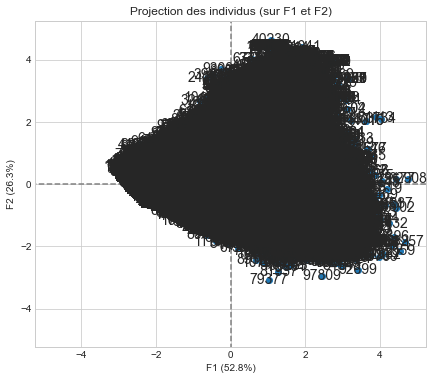

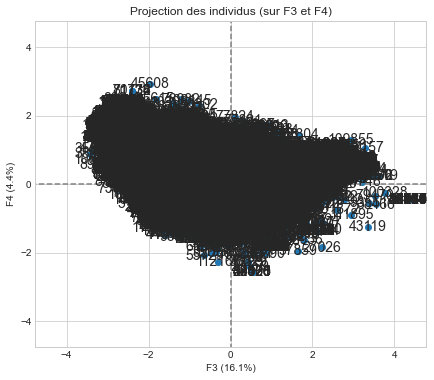

In [133]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()

On observe qu'avec plus de 112000 produits, on a un agregat illisible sur le premier et le second plans factoriels. 

# APPLICATION

## Description du projet d'application

   Mon projet est de créer une application qui permettrai de venir en aide à ceux qui souhaite limiter leur apport en sucre afin bien évidemment de rester en bonne santé et d'éviter les maladies liées à une consommation excessive en sucre (diabète, obésité, cancer, maladie du coeur, carie dentaire, etc).
    "L'OMS (Organisation mondiale de la santé) a revu à la baisse ses préconisations sur le sucre qui doit constituer, selon ses conseils, 5 % des apports énergétiques quotidiens, c'est-à-dire, l'équivalent de 25 grammes par jour, soit six cuillères à café pour une ration de 2.000 calories."

   En pratique, après avoir pris en photo le code barre du produit, l’application informe l’utilisateur de la note sur le produit et sa recommandation. On affiche l'apport énergétique en kilojoule ainsi que l'apport nutritionnel (quantité de glucide et/ou de sucre simple et/ou de sucre complexe). On informe également le consomateur du nutrisport associé au produit (catégorie entre "a" et "e") et le sweetscore ("A","B" et "C"). L’application recommande également des produits de la même catégorie avec une valeur en sucre simple plus bas; l’utilisateur peut alors choisir des produits plus adaptés à une alimentation saine et équilibré ou selon son régime alimentaire.

## Principe de l'application

L'analyse multivariée (ACP) nous apprend que les principales informations (nouvelles variables) sont sur les deux premiers plans factoriels. Nous allons exploiter ces nouvelles variables pour l'application, à savoir :
- F1 représente les produits riches en glucide;
- F2 représente les produits comprenants le plus de sucre complexe;
- F3 représente les produits comprenants le plus de sucre simple;
- F4 représente les produits riche en energie;

Lors du scan d'un code à barre d'un produit alimentaire (pour 100 grammes), l'application affiche :

- le Nutriscore et le Sweetscore;
- la Quantité de glucide et si on a l'information la quantité de sucre simple et/ou complexe inclus (sous forme d'un graphique);
- la Quantité d'apports énergétiques correspondante (en kilojoule et sous forme d'un graphique);
- La Recommandation d’un produit similaire plus pauvre en sucre;


Remarque:
les Préconisation  general de l'OMS sur le sucre, nous conseillant "5 % des apports énergétiques quotidiens, c'est-à-dire, l'équivalent de 25 grammes par jour, soit six cuillères à café pour une ration de 2.000 calories.      

Afin de calculer un sweetscore, nous avons besoin de plusieurs autres variables. Le score prend en compte pour 100g de produit, la teneur :
- En nutriments et aliments à favoriser (sucres complexes),
- En nutriments à limiter (énergies, sucres).
Ci-dessous, un tableau pour calculer les points du score.

point  énergie (kj)  sucres simples   point  sucres complexes
-----------------------------------------------------------------------
0        <=300 kj           <=4g                   0       <=10g  
-----------------------------------------------------------------------
5         >300 kj            >4g                    -2       >100g 
-----------------------------------------------------------------------
10        >1500 kj         >25g                  -5       >275g
-----------------------------------------------------------------------
Total  =    a          +       b            +                       c
-----------------------------------------------------------------------

Ainsi qu'un tableau 

    Note       Grade    Couleur
-------------------------------------
    <0             A          Vert
-----------------------------------    
    >=0 à <15    B       Jaune
--------------------------------------
    15 et +      C       Rouge
-------------------------------------

Nous allons définir la fonction de calcul du Sweetscore et l'appliquer à notre jeu de données: 


In [ ]:
def calcul_score(row):
    #score énergie
    if row["energy_100g"] <= 300:
        a = 0
    elif ((row["energy_100g"] > 300) & (row["energy_100g"] <= 1500)):
        a = 5
    else:
        a = 10 
    #score sucre simple
    if row["sugars_100g"] <= 4:
        b = 0
    elif ((row["sugars_100g"] > 4) & (row["sugars_100g"] <= 25)):
        b = 5
    else:
        b = 10
    #score sucre complexe
    if row["carbohydrates_complexes_100g"] <= 10:
        c = 0
    elif ((row["carbohydrates_complexes_100g"] > 10) & (row["carbohydrates_complexes_100g"] <= 100)):
        c = -2
    else:
        c = -5

    score = a+b+c
    
    return score

def calcul_sweetscore(row):
    if row["calcul_score"] < 0 :
        nutriscore = "a"
    elif ((row["calcul_score"] >= 0) & (row["calcul_score"] < 15)) :
        nutriscore = "b"
    else:
        nutriscore = "c"
        
    return sweetscore
